In [1]:
%load_ext autoreload

from PIL import Image, ImageDraw
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T

In [2]:
plt.rcParams["savefig.bbox"] = 'tight'
img = Image.open(Path('../assets') / 'imgnet.jpeg')
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(orig_img, imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

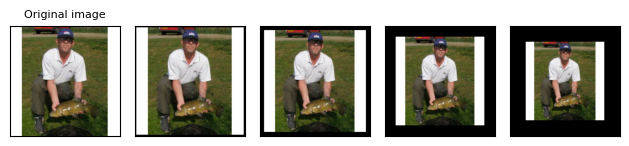

In [3]:
padded_imgs = [T.Pad(padding=padding)(img) for padding in (3, 10, 30, 50)]
plot(img, padded_imgs)

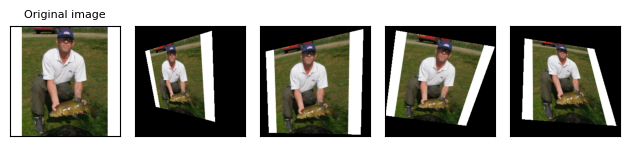

In [4]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(img) for _ in range(4)]
plot(img, perspective_imgs)

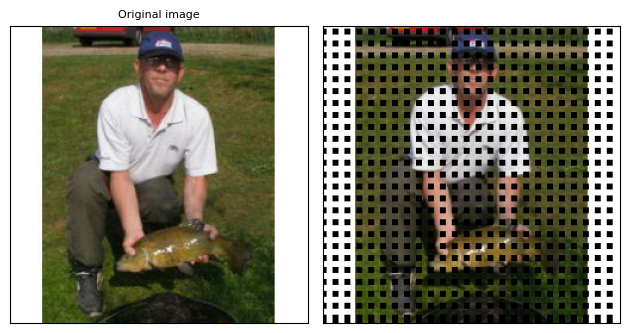

In [5]:
gridmask_transformer = T.GridMask()
gridmask_img = [gridmask_transformer(img)]
plot(img, gridmask_img)

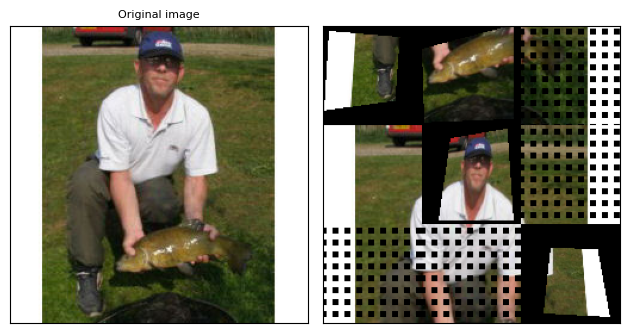

In [6]:
mosaic_transformer = T.RandomMosaic((3, 3), [None, gridmask_transformer, perspective_transformer])
mosaic_img = [mosaic_transformer(img)]
plot(img, mosaic_img)